# Credit Default Risk Analysis: Predicting Client Repayment Behavior  

**Goal**  
This project explores how data can be used to predict which credit card clients are most likely to default on their payments. Within this project I examine the well-known Taiwan credit card dataset (30,000+ records via Kaggle). Throughout this project I applied data cleaning, exploratory analysis, and machine learning models to uncover patterns in repayment behavior.

**Why I chose this project**  
I wanted to work on a problem that reflects real challenges faced by risk analysts and financial institutions: identifying high-risk customers, improving credit policies, and protecting portfolios from losses. Furthermore, this project allowed me to apply and assess the skills I had learnt from online coding courses and financial simulations.

**Methods and structure**  
My analysis followed a clear workflow:  
1. Data Preparation   
2. Data Cleaning
3. Exploratory Data Analysis (EDA)  
4. Modelling (Logistic Regression, Decision Tree, Random Forest)  
5. Model Evaluation  
6. Advanced Risk Analysis (Stress Testing & Segmentation)  
7. Key Insights & Conclusion  


## 1) Data Preparation — Imports & Display Settings

**Purpose**: Import core libraries and set consistent display/plot styling so EDA outputs are clear and readable throughout the notebook.

**Notes**: `sns.set("whitegrid")` applies a global style that’s great for EDA; pandas display options ensure wide tables don’t wrap.


In [146]:
# 1.1 Colab setup: mount Google Drive for data access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# --- 1.2 Imports & display/plot settings (EDA readability) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for cleaner visuals
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 180)

In [148]:
# 1.3 Load raw dataset
# File path inside My Drive
path = "/content/drive/MyDrive/credit-risk-project/data/UCI_Credit_Card.csv"

df = pd.read_csv(path)

# Quick checks
print(df.shape)
df.head()

# Shape (rows, columns)
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())

(30000, 25)
Shape: (30000, 25)
Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [149]:
# 1.4 Dtypes snapshot (read-only)
print("\nDtypes:\n", df.dtypes)


Dtypes:
 ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


## 2) Data Cleaning

**Purpose:** Minimal, auditable fixes so the data is ready for EDA/modelling.

**Notes:** Standardise names, check dtypes, tidy special codes (e.g., `education` {0,5,6} and `marital_status` 0 → "other"), keep `pay_*` as ordered, target = `default_next_month`.



In [150]:
# 2.1 Rename columns for readability (no value changes)
df = df.rename(columns={
    'LIMIT_BAL': 'credit_limit',
    'SEX': 'gender',
    'EDUCATION': 'education',
    'MARRIAGE': 'marital_status',
    'AGE': 'age',
    'PAY_0': 'pay_sep',     # payment status in September
    'PAY_2': 'pay_aug',
    'PAY_3': 'pay_jul',
    'PAY_4': 'pay_jun',
    'PAY_5': 'pay_may',
    'PAY_6': 'pay_apr',
    'default.payment.next.month': 'default_next_month'
})

df.head()

,ID,credit_limit,gender,education,marital_status,age,pay_sep,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [151]:
# 2.2 Double check: renamed columns present
expected = ["default_next_month","pay_apr","pay_may","pay_jun","pay_jul","pay_aug","pay_sep"]
missing = [c for c in expected if c not in df.columns]
assert not missing, f"Missing expected columns after rename: {missing}"

In [152]:
# 2.3 Missing values check (diagnostic only; no transformations)
missing_count = df.isna().sum()
missing_pct = (df.isna().mean() * 100).round(2)

print("Missing counts (top 15):")
print(missing_count[missing_count > 0].sort_values(ascending=False).head(15))

print("\nMissing % (top 15):")
print(missing_pct[missing_pct > 0].sort_values(ascending=False).head(15))


Missing counts (top 15):
Series([], dtype: int64)

Missing % (top 15):
Series([], dtype: float64)


In [153]:
# 2.4 Duplicate ID diagnostic (no data changes)
if "ID" in df.columns:
    dup = df["ID"].duplicated().sum()
    print(f"Duplicate IDs: {dup}")

Duplicate IDs: 0


In [154]:
# 2.5 Check for any duplicates
print("Duplicate rows:", df.duplicated().sum())

# If >0, drop them:
df = df.drop_duplicates()

Duplicate rows: 0


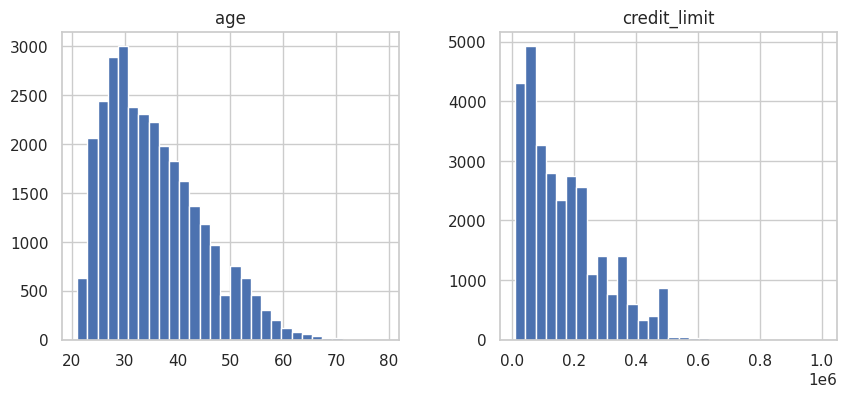

In [155]:
# 2.6 Look at distribution of numeric columns
df[['age','credit_limit']].hist(bins=30, figsize=(10,4))
plt.show()

In [156]:
# 2.7 Label/value range spot-checks (no data changes)
for col in ["gender","education","marital_status"]:
    if col in df.columns:
        print(f"{col} unique:", sorted(df[col].unique().tolist()))

for col in ["pay_apr","pay_may","pay_jun","pay_jul","pay_aug","pay_sep"]:
    if col in df.columns:
        print(f"{col} unique:", sorted(df[col].unique().tolist()))

gender unique: [1, 2]
education unique: [0, 1, 2, 3, 4, 5, 6]
marital_status unique: [0, 1, 2, 3]
pay_apr unique: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
pay_may unique: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
pay_jun unique: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
pay_jul unique: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
pay_aug unique: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
pay_sep unique: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


## 3) Exploratory Data Analysis (EDA)

**Purpose.** Understand the cleaned dataset: what the target looks like, how key features behave, and how variables relate. This step is **read-only**—no transformations—so findings can guide modelling choices.

**Notes.**
- Use the renamed columns (e.g., `default_next_month`, `pay_*`).
- Keep visuals simple and comparable; flag outliers/skew (e.g., `credit_limit`, `BILL_AMT*`, `PAY_AMT*`).
- Call out any class imbalance in `default_next_month` and note implications for evaluation/splitting.
- Structure:
  - **3.1** Summary stats
  - **3.2** Target variable
  - **3.3** Feature distributions
  - **3.4** Correlations & pairwise relationships



In [157]:
# 3.1 Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
credit_limit,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marital_status,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_sep,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


,count,default_rate
pay_sep,,
-2,2759,0.132294
-1,5686,0.167781
0,14737,0.128113
1,3688,0.339479
2,2667,0.691414
3,322,0.757764
4,76,0.684211
5,26,0.500000
6,11,0.545455


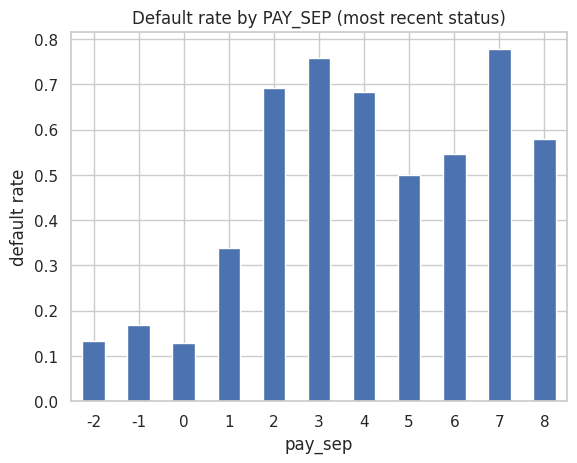

In [158]:
# 3.2 Target Variable: Default vs. Non-default counts (proportion of clients who defaulted vs did not default)
df['default_next_month'].value_counts(normalize=True) * 100

# Target by recent payment status (PAY_SEP)
# Read-only: show default rate by PAY_SEP; keep raw codes to avoid mislabeling.
assert "pay_sep" in df.columns and "default_next_month" in df.columns

rate = (df.groupby("pay_sep")["default_next_month"]
          .mean()
          .rename("default_rate")
          .sort_index())

count = df["pay_sep"].value_counts().sort_index()

# Table for context (counts + default rate)
display(pd.DataFrame({"count": count, "default_rate": rate}).sort_index())

# Bar chart of default rate by PAY_SEP
ax = rate.plot(kind="bar", rot=0, title="Default rate by PAY_SEP (most recent status)")
ax.set_ylabel("default rate")
plt.show()

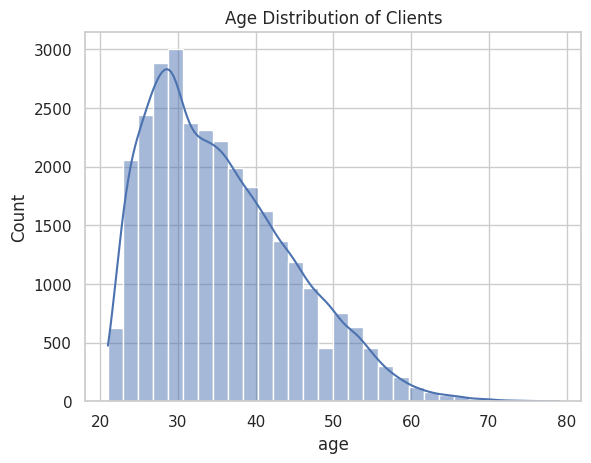

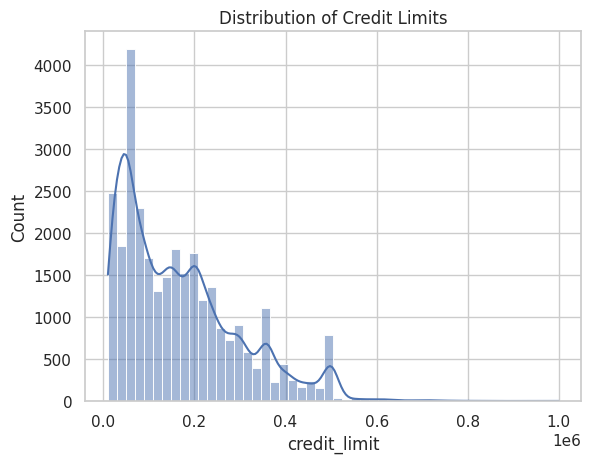

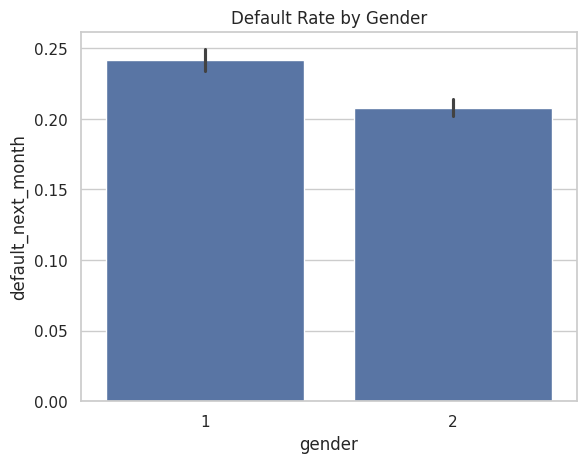

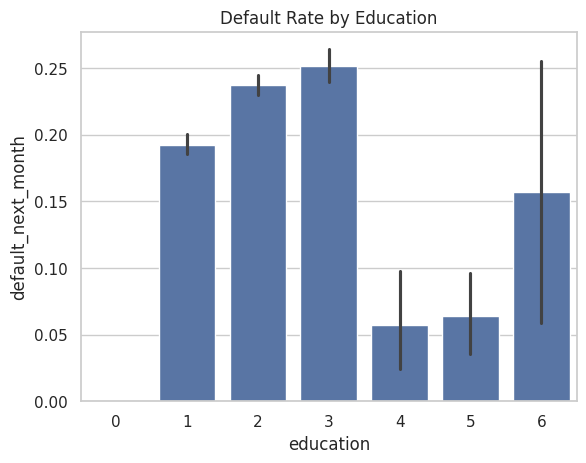

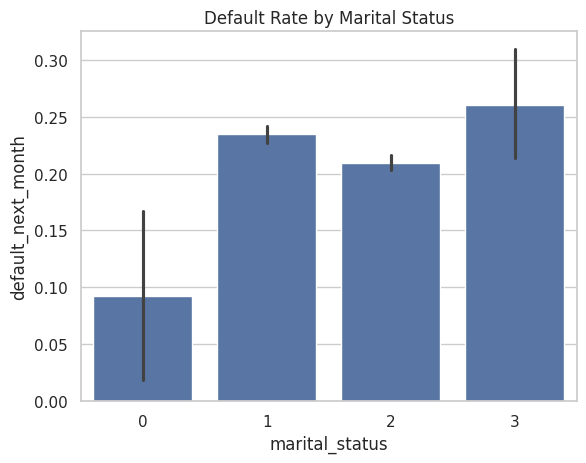

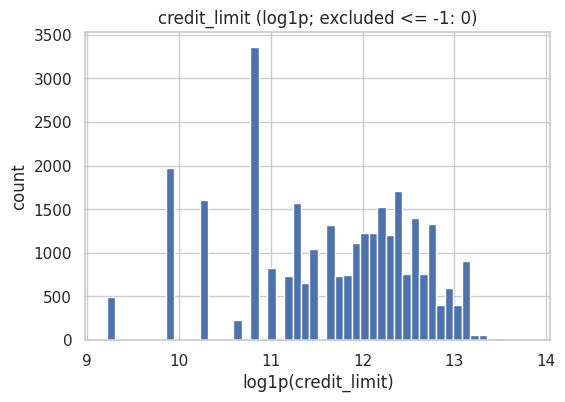

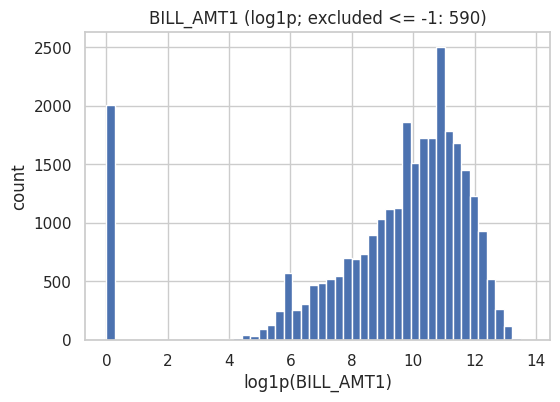

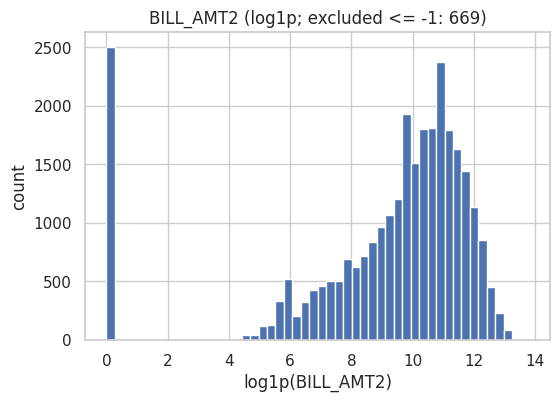

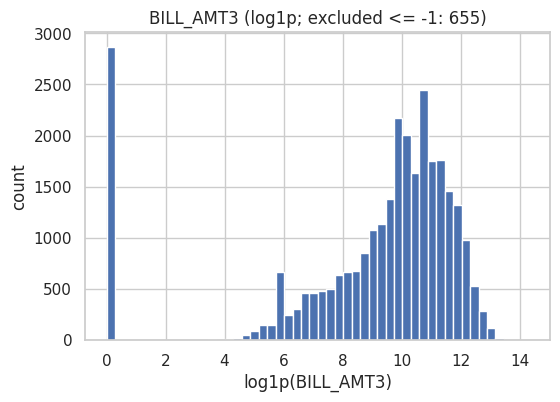

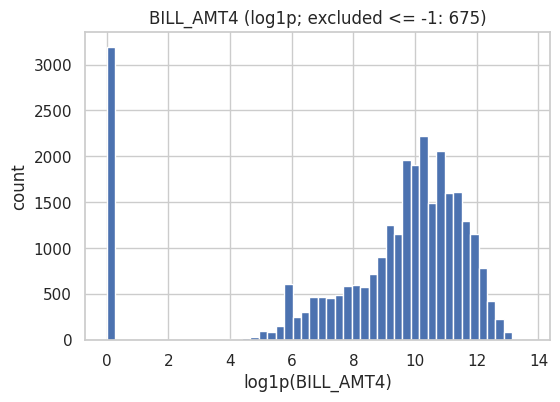

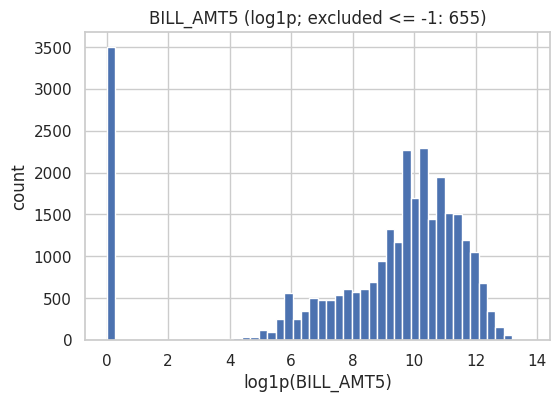

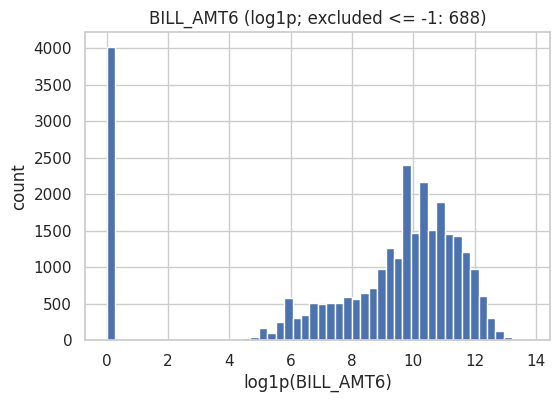

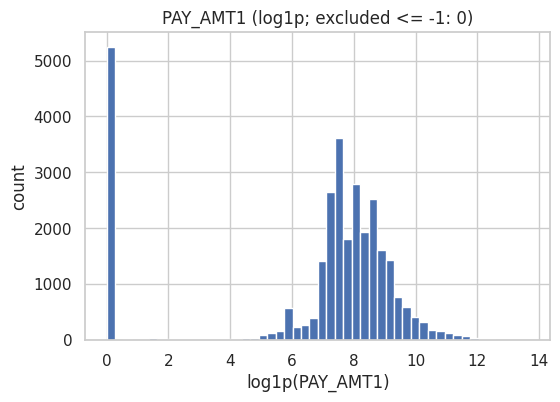

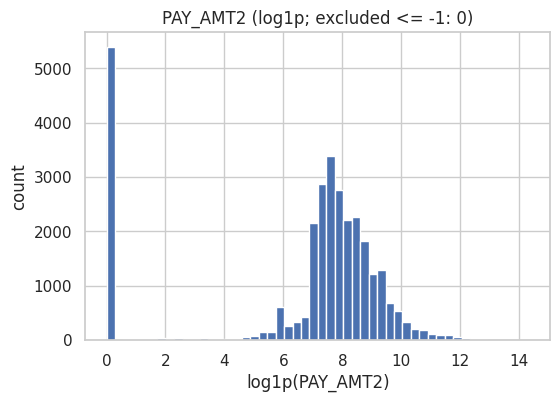

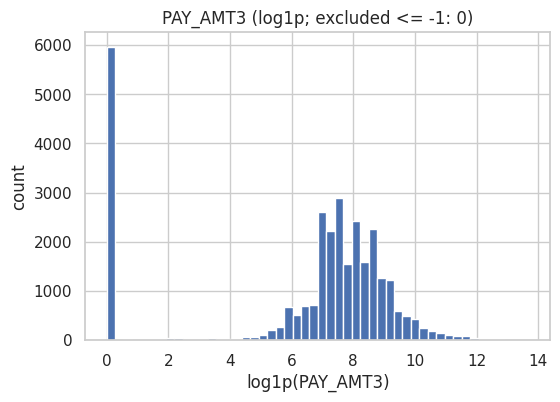

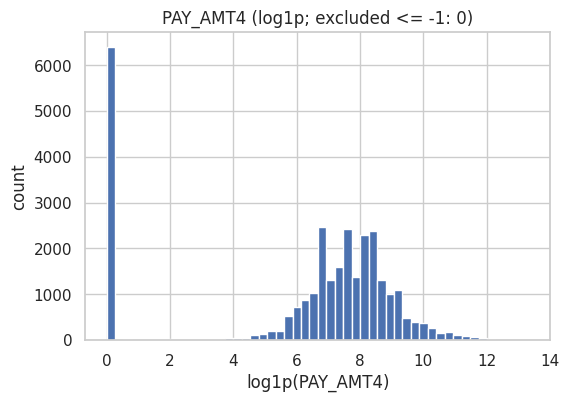

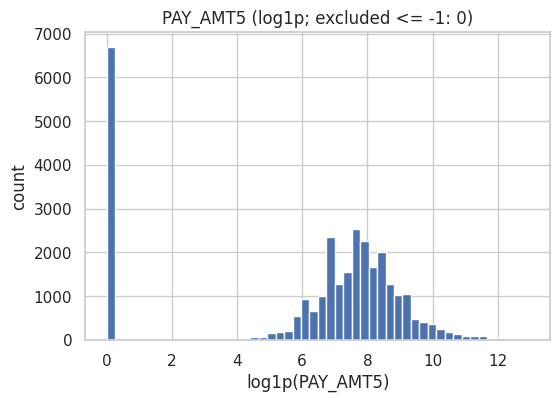

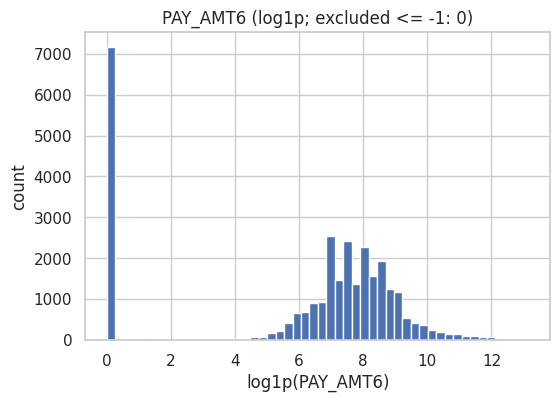

In [159]:
# 3.3 Feature Distributions: Visualisation of client demographics and financial variables

# Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

# Credit limit distribution
sns.histplot(df['credit_limit'], bins=50, kde=True)
plt.title("Distribution of Credit Limits")
plt.show()

# Default rate by gender
sns.barplot(x='gender', y='default_next_month', data=df)
plt.title("Default Rate by Gender")
plt.show()

# Default rate by education
sns.barplot(x='education', y='default_next_month', data=df)
plt.title("Default Rate by Education")
plt.show()

# Default rate by marital status
sns.barplot(x='marital_status', y='default_next_month', data=df)
plt.title("Default Rate by Marital Status")
plt.show()

# log view (reveal structure hidden by long right tails e.g. credit_limit) but excludes values <=1 as log1p would be -inf
skew_cols = [c for c in [
    "credit_limit",
    "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",
    "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"
] if c in df.columns]

for col in skew_cols:
    s = df[col].dropna()
    mask_valid = s > -1              # exclude values that would break log1p
    excluded = (~mask_valid).sum()
    s_valid = s[mask_valid]
    if s_valid.empty:
        print(f"{col}: no values > -1; skipped log plot.")
        continue

    plt.figure(figsize=(6,4))
    np.log1p(s_valid).hist(bins=50)
    plt.title(f"{col} (log1p; excluded <= -1: {excluded})")
    plt.xlabel(f"log1p({col})")
    plt.ylabel("count")
    plt.show()

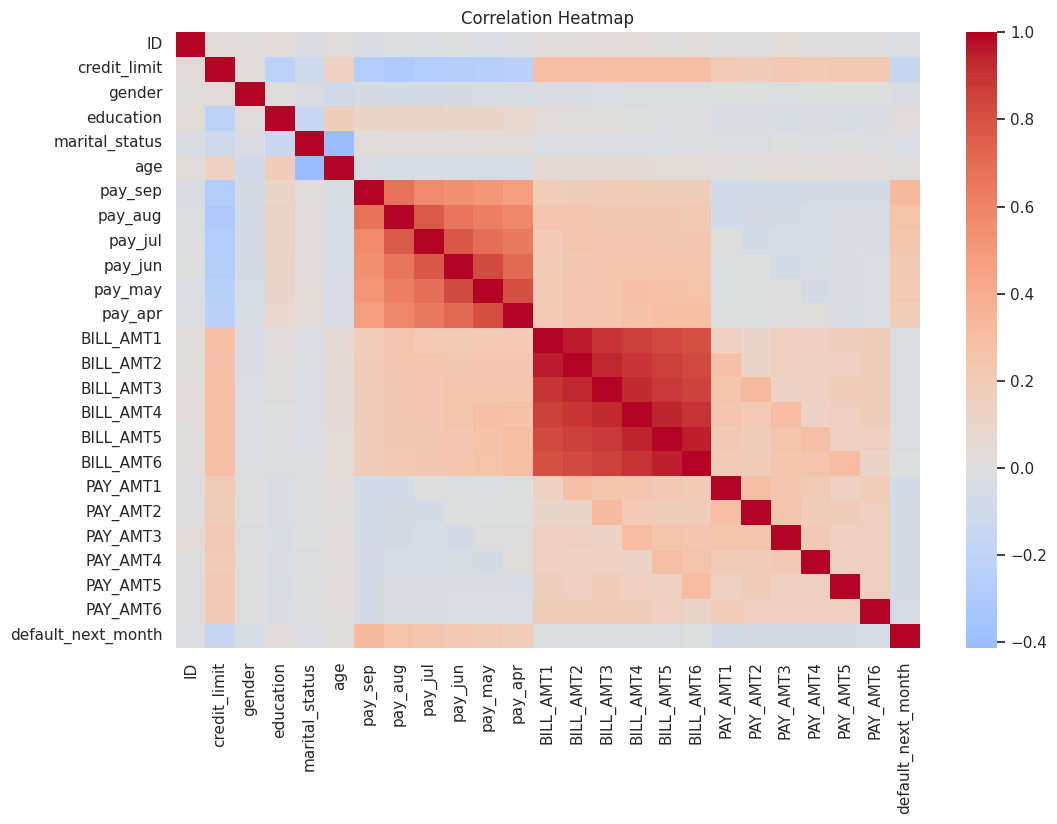

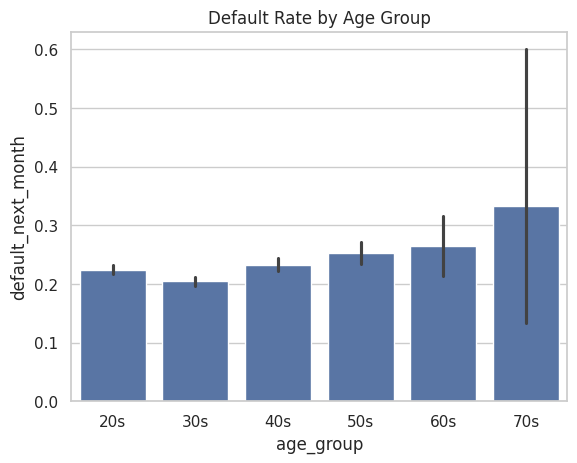

Top features by |corr| (then MI):


,feature,corr_with_target,abs_corr,mutual_info
5,pay_sep,0.324794,0.324794,0.074656
6,pay_aug,0.263551,0.263551,0.050845
7,pay_jul,0.235253,0.235253,0.035747
8,pay_jun,0.216614,0.216614,0.034874
9,pay_may,0.204149,0.204149,0.028759
10,pay_apr,0.186866,0.186866,0.026311
0,credit_limit,-0.153520,0.153520,0.019485
17,PAY_AMT1,-0.072929,0.072929,0.022586
18,PAY_AMT2,-0.058579,0.058579,0.017064
20,PAY_AMT4,-0.056827,0.056827,0.017106



Top features by mutual information:


,feature,corr_with_target,abs_corr,mutual_info
5,pay_sep,0.324794,0.324794,0.074656
6,pay_aug,0.263551,0.263551,0.050845
7,pay_jul,0.235253,0.235253,0.035747
8,pay_jun,0.216614,0.216614,0.034874
9,pay_may,0.204149,0.204149,0.028759
10,pay_apr,0.186866,0.186866,0.026311
17,PAY_AMT1,-0.072929,0.072929,0.022586
0,credit_limit,-0.153520,0.153520,0.019485
19,PAY_AMT3,-0.056250,0.056250,0.017493
20,PAY_AMT4,-0.056827,0.056827,0.017106


In [160]:
# 3.4 Correlation heatmap to visualise relationships between variables and default status
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

df['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80], labels=['20s','30s','40s','50s','60s','70s'])
sns.barplot(x='age_group', y='default_next_month', data=df)
plt.title("Default Rate by Age Group")
plt.show()

# Features (all columns except the target and the 'age_group' column)
X = df.drop(['default_next_month', 'age_group'], axis=1)

# Target (default or not)
y = df['default_next_month']

# Target-feature signal (quick ranking of figures by how much signal they have for the model)

from sklearn.feature_selection import mutual_info_classif

TARGET = "default_next_month"

# Numeric-only quick scan (keeps your dataset intact)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[num_cols].drop(columns=[TARGET, "ID"], errors="ignore").copy()
y = df[TARGET].astype(int)  # ensure 0/1

# Point-biserial correlation (== Pearson with binary y)
corr_with_target = X.apply(lambda s: s.corr(y))

# Mutual information (nonparametric)
mi = mutual_info_classif(X.fillna(0), y, random_state=42)

feat_signal = (
    pd.DataFrame({
        "feature": X.columns,
        "corr_with_target": corr_with_target.values,
        "abs_corr": corr_with_target.abs().values,
        "mutual_info": mi,
    })
    .sort_values(["abs_corr", "mutual_info"], ascending=False)
)

print("Top features by |corr| (then MI):")
display(feat_signal.head(15))

print("\nTop features by mutual information:")
display(feat_signal.sort_values("mutual_info", ascending=False).head(15))


## 4) Modelling

**Purpose.** Train simple, comparable classifiers to predict `default_next_month`, then use results to guide any later tuning/feature work. This section is fully reproducible and avoids leakage.

**Notes.**
- One **stratified** train/test split (fix the RNG).  
- **Standardise** numeric features for Logistic Regression only (fit on train, apply to test).  
- Keep categorical codes as-is for baselines; no target encoding yet.  
- Tackle imbalance via `class_weight="balanced"` (LR) and class weights/params for trees; report both with/without if helpful.  
- Metrics to report: **ROC-AUC** (ranking), **PR-AUC/F1/Recall** for the positive class, plus a confusion matrix at a sensible threshold.  
- Establish a **baseline** (e.g., DummyClassifier) so improvements are meaningful.

**Structure.**
- **4.1** Logistic Regression (regularised)
- **4.2** Decision Tree (depth-tuned)
- **4.3** Random Forest (baseline ensemble)
- **4.4** Model Comparison
*(Section 5 will consolidate results in a single evaluation table.)*


In [161]:
# 4.0 Split guard (idempotent): reuse if present, else create from df
from sklearn.model_selection import train_test_split

def _has_split():
    return all(k in globals() for k in ("X_train","X_test","y_train","y_test"))

if not _has_split():
    # requires Sections 1–2 (cleaning/renaming) to have run so df/default_next_month exist
    assert "df" in globals(), "df not found — run Sections 1–2 first."
    assert "default_next_month" in df.columns, "Target 'default_next_month' missing — run renaming cell."

    X = df.drop(columns=["default_next_month"]).copy()
    y = df["default_next_month"].astype(int).copy()

    # Safety: never use ID as a feature
    if "ID" in X.columns:
        X = X.drop(columns=["ID"])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=42
    )
    print("Created train/test split:", X_train.shape, X_test.shape)
else:
    # Safety: ensure ID is not in the existing split
    if "ID" in X_train.columns:
        X_train = X_train.drop(columns=["ID"])
        X_test  = X_test.drop(columns=["ID"])
    print("Using existing split:", X_train.shape, X_test.shape)


Using existing split: (24000, 23) (6000, 23)


## 4.1 Logistic Regression

In [162]:
#4.1a Logistic Regression setup
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (24000, 23)
Test shape: (6000, 23)


In [163]:
# 4.1a Safety guard: ensure ID is not used as a feature
if "ID" in X_train.columns:
    X_train = X_train.drop(columns=["ID"])
    X_test  = X_test.drop(columns=["ID"])

In [164]:
# 4.1b Fit Logistic Regression (Pipeline: numeric scaled + categorical one-hot)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop"
)

log_reg = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

log_reg.fit(X_train, y_train)
y_proba = log_reg.predict_proba(X_test)[:, 1]


In [165]:
# 4.1c Default-threshold evaluation (robust to Pipeline vs plain LR)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Use the right matrix for prediction
X_eval = X_test
if not isinstance(log_reg, Pipeline) and "X_test_lr" in globals():
    X_eval = X_test_lr  # numeric-only LR path

y_pred = log_reg.predict(X_eval)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


Accuracy: 0.6796666666666666

Confusion Matrix:
 [[3255 1418]
 [ 504  823]]

Classification Report:
               precision    recall  f1-score   support

           0      0.866     0.697     0.772      4673
           1      0.367     0.620     0.461      1327

    accuracy                          0.680      6000
   macro avg      0.617     0.658     0.617      6000
weighted avg      0.756     0.680     0.703      6000



In [166]:
# 4.1d Logistic Regression coefficients (works for Pipeline or plain LR)
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

if isinstance(log_reg, Pipeline):
    # Pull estimator and preprocessor from the pipeline
    clf = log_reg.named_steps["clf"]          # the LogisticRegression
    pre = log_reg.named_steps["prep"]         # the ColumnTransformer

    # Get feature names produced by the preprocessor
    try:
        feature_names = pre.get_feature_names_out()
    except Exception:
        # Fallback: build names from parts
        # Assumes transformers named ("num", scaler, num_cols) and ("cat", ohe, cat_cols)
        num_cols = pre.named_transformers_["num"].feature_names_in_
        cat_cols = pre.named_transformers_["cat"].feature_names_in_
        cat_names = pre.named_transformers_["cat"].get_feature_names_out(cat_cols)
        feature_names = np.r_[num_cols, cat_names]
else:
    clf = log_reg
    # If using the numeric-only path, use those columns; else use X_train
    feature_names = (X_train_lr.columns if "X_train_lr" in globals() else X_train.columns)

# Build coefficient frame
coefs = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": clf.coef_.ravel()
})
coefs["Abs_Coeff"] = coefs["Coefficient"].abs()
coefs_sorted = coefs.sort_values("Abs_Coeff", ascending=False)
coefs_sorted.head(15)


,Feature,Coefficient,Abs_Coeff
5,num__pay_sep,0.590401,0.590401
11,num__BILL_AMT1,-0.285129,0.285129
17,num__PAY_AMT1,-0.184401,0.184401
18,num__PAY_AMT2,-0.161328,0.161328
0,num__credit_limit,-0.136720,0.136720
6,num__pay_aug,0.101077,0.101077
2,num__education,-0.094227,0.094227
7,num__pay_jul,0.090222,0.090222
4,num__age,0.079673,0.079673
12,num__BILL_AMT2,0.073675,0.073675


In [167]:
# 4.1e Get LR probabilities for ROC/PR metrics (positive class)
# ⬇️ replace `log_reg` with your LR model variable name if different
y_proba = log_reg.predict_proba(X_test)[:, 1]

In [168]:
# 4.1f Baseline & metrics (read-only)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

# Ensure y_test and y_pred_proba from my LR section exist:
# y_test, y_pred, y_proba = ...

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
d_proba = dummy.predict_proba(X_test)[:, 1]
print("Baseline (dummy) Accuracy:", dummy.score(X_test, y_test))
print("Baseline ROC-AUC:", roc_auc_score(y_test, d_proba))
print("Baseline PR-AUC:", average_precision_score(y_test, d_proba))

print("\nLogReg ROC-AUC:", roc_auc_score(y_test, y_proba))
print("LogReg PR-AUC:", average_precision_score(y_test, y_proba))

Baseline (dummy) Accuracy: 0.7788333333333334
Baseline ROC-AUC: 0.5
Baseline PR-AUC: 0.22116666666666668

LogReg ROC-AUC: 0.7081149369197677
LogReg PR-AUC: 0.49044428075931484


In [169]:
# 4.1g Lift vs. dummy (read-only)
from sklearn.metrics import roc_auc_score, average_precision_score

lr_roc = roc_auc_score(y_test, y_proba)
lr_pr  = average_precision_score(y_test, y_proba)

# assumes d_proba from your DummyClassifier cell
dum_roc = roc_auc_score(y_test, d_proba)
dum_pr  = average_precision_score(y_test, d_proba)

print(f"Lift ROC-AUC: {lr_roc - dum_roc:+.3f}")
print(f"Lift PR-AUC:  {lr_pr - dum_pr:+.3f}")

Lift ROC-AUC: +0.208
Lift PR-AUC:  +0.269


In [170]:
# 4.1h Sanity: ensure ID not used as a feature
assert "ID" not in X_train.columns, "Remove ID from features."

# Threshold tuning to maximise F1 (keeps my model; just picks a better cutoff)
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.linspace(0.1, 0.9, 81)
scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_t = thresholds[int(np.argmax(scores))]
print(f"Best F1 threshold: {best_t:.2f}, F1={max(scores):.3f}")

Best F1 threshold: 0.60, F1=0.497


In [171]:
# 4.1i Confusion & report @ best-F1 threshold (read-only)
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Reuse best_t if present; otherwise compute it
try:
    best_t
except NameError:
    thresholds = np.linspace(0.1, 0.9, 81)
    f1s = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
    best_t = thresholds[int(np.argmax(f1s))]

y_pred_best = (y_proba >= best_t).astype(int)
print(f"Confusion @ threshold={best_t:.2f}")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification report @ best-F1 threshold:")
print(classification_report(y_test, y_pred_best, digits=3))

Confusion @ threshold=0.60
[[4200  473]
 [ 731  596]]

Classification report @ best-F1 threshold:
              precision    recall  f1-score   support

           0      0.852     0.899     0.875      4673
           1      0.558     0.449     0.497      1327

    accuracy                          0.799      6000
   macro avg      0.705     0.674     0.686      6000
weighted avg      0.787     0.799     0.791      6000



## 4.2 Decision Tree

In [172]:
# 4.2a
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8171666666666667

Confusion Matrix:
 [[4431  242]
 [ 855  472]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [173]:
# 4.2b Depth sweep (read-only): test depth & class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd

depths = [2, 3, 4, 5, 6, 8, 12, None]
rows = []
for d in depths:
    dt_tmp = DecisionTreeClassifier(
        max_depth=d, random_state=42, class_weight="balanced"
    )
    dt_tmp.fit(X_train, y_train)
    p = dt_tmp.predict_proba(X_test)[:, 1]
    rows.append({
        "max_depth": d if d is not None else "None",
        "ROC_AUC": roc_auc_score(y_test, p),
        "PR_AUC": average_precision_score(y_test, p),
    })
pd.DataFrame(rows).round(3)

,max_depth,ROC_AUC,PR_AUC
0,2,0.723,0.448
1,3,0.737,0.473
2,4,0.748,0.492
3,5,0.757,0.512
4,6,0.763,0.517
5,8,0.746,0.502
6,12,0.698,0.423
7,None,0.606,0.285


In [174]:
# 4.2c Decision Tree (balanced) quick check
dt_bal = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")
dt_bal.fit(X_train, y_train)
dt_bal_proba = dt_bal.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, average_precision_score
print("DT_bal ROC-AUC:", roc_auc_score(y_test, dt_bal_proba))
print("DT_bal PR-AUC:", average_precision_score(y_test, dt_bal_proba))

DT_bal ROC-AUC: 0.7570667228290081
DT_bal PR-AUC: 0.5116117921774037


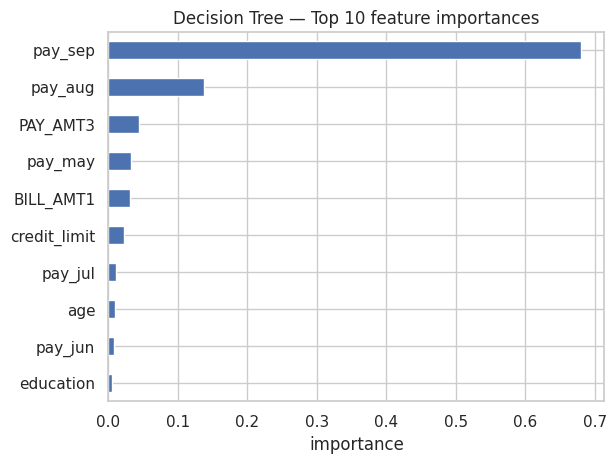

In [175]:
# 4.2d Feature importance (top 10)
import matplotlib.pyplot as plt
import pandas as pd

dt_used = dt
imp = pd.Series(dt_used.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
imp.plot(kind="barh")
plt.title("Decision Tree — Top 10 feature importances")
plt.xlabel("importance")
plt.gca().invert_yaxis()
plt.show()

## 4.3 Random Forest

Random Forest Accuracy: 0.812

Confusion Matrix:
 [[4397  276]
 [ 852  475]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



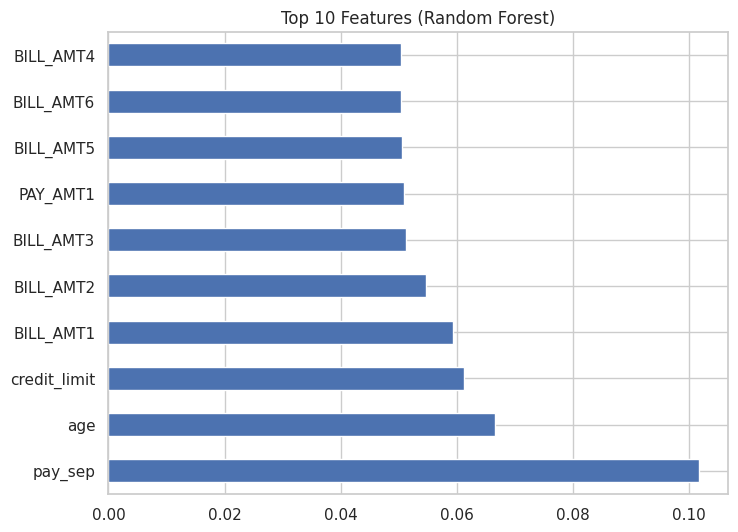

In [176]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

import pandas as pd

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Features (Random Forest)")
plt.show()

In [177]:
# 4.3b Random Forest variants (read-only): class_weight + n_estimators sweep
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd

rf_bal = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight="balanced")
rf_bal.fit(X_train, y_train)
rf_bal_proba = rf_bal.predict_proba(X_test)[:, 1]

print("RF_bal ROC-AUC:", roc_auc_score(y_test, rf_bal_proba))
print("RF_bal PR-AUC:", average_precision_score(y_test, rf_bal_proba))


variants = [
    {"label": "RF@100", "n": 100, "cw": None},
    {"label": "RF@100_bal", "n": 100, "cw": "balanced"},
    {"label": "RF@300_bal", "n": 300, "cw": "balanced"},
]

rows = []
for v in variants:
    rf_tmp = RandomForestClassifier(
        n_estimators=v["n"], random_state=42, n_jobs=-1, class_weight=v["cw"]
    )
    rf_tmp.fit(X_train, y_train)
    p = rf_tmp.predict_proba(X_test)[:, 1]
    rows.append({
        "model": v["label"],
        "ROC_AUC": roc_auc_score(y_test, p),
        "PR_AUC": average_precision_score(y_test, p),
    })
pd.DataFrame(rows).round(3)

RF_bal ROC-AUC: 0.7563224159181535
RF_bal PR-AUC: 0.5353693015016445


,model,ROC_AUC,PR_AUC
0,RF@100,0.751,0.532
1,RF@100_bal,0.752,0.531
2,RF@300_bal,0.758,0.538


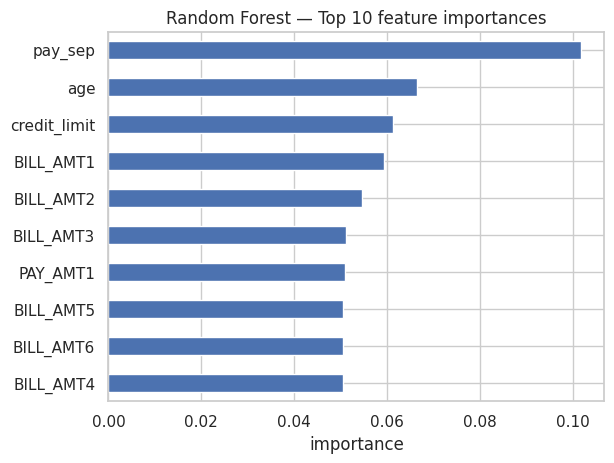

In [178]:
# 4.3c Feature importance (top 10)
import matplotlib.pyplot as plt
import pandas as pd

rf_used = rf
imp_rf = pd.Series(rf_used.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
imp_rf.plot(kind="barh")
plt.title("Random Forest — Top 10 feature importances")
plt.xlabel("importance")
plt.gca().invert_yaxis()
plt.show()

## 4.4 Model comparison

In [179]:
# 4.4 Model comparison (read-only): baseline vs LR vs DT vs RF
import numpy as np
import pandas as pd
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score)

# Collect probabilities
probas = {
    "Dummy": d_proba,
    "LogReg@best": y_proba,            # threshold will be best_t
    "DecisionTree": dt.predict_proba(X_test)[:, 1],
    "RandomForest": rf.predict_proba(X_test)[:, 1],
}

# Thresholds (50% for tree/RF; best_t for LR)
thr = {
    "Dummy": 0.5,
    "LogReg@best": best_t,   # from my tuning cell
    "DecisionTree": 0.5,
    "RandomForest": 0.5,
}

def row(name, proba, t):
    yhat = (proba >= t).astype(int)
    return dict(
        Model=name,
        Threshold=round(t, 2),
        Accuracy=accuracy_score(y_test, yhat),
        Precision=precision_score(y_test, yhat, zero_division=0),
        Recall=recall_score(y_test, yhat, zero_division=0),
        F1=f1_score(y_test, yhat, zero_division=0),
        ROC_AUC=roc_auc_score(y_test, proba),
        PR_AUC=average_precision_score(y_test, proba),
    )

summary = pd.DataFrame([row(n, p, thr[n]) for n, p in probas.items()])[
    ["Model","Threshold","Accuracy","Precision","Recall","F1","ROC_AUC","PR_AUC"]
].round(3)
summary

,Model,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC
0,Dummy,0.5,0.779,0.000,0.000,0.000,0.500,0.221
1,LogReg@best,0.6,0.799,0.558,0.449,0.497,0.708,0.490
2,DecisionTree,0.5,0.817,0.661,0.356,0.463,0.742,0.488
3,RandomForest,0.5,0.813,0.630,0.370,0.466,0.751,0.532


## 5) Model Evaluation

**Purpose.** Consolidate results from the models trained in §4 on the shared test set, pick sensible operating thresholds, and decide on a final model that fits the risk brief (higher cost for missed defaulters).

**Notes.**
- **Read-only:** no refits here; evaluate the already-fitted models on the same test split.
- Prioritise **PR-AUC** and **recall/precision** for the positive class (default), with **ROC-AUC** as a secondary view.
- Report each model at its **chosen threshold** (e.g., LR at best-F1, trees/forests at 0.5 unless tuned) with a confusion matrix.
- **calibration** (reliability), **lift/gains**, and a simple **cost-sensitive** view (FN >> FP).

**Structure.**
- **5.1** Test-set comparison table (aggregate metrics across models)
- **5.2** Confusion matrices (per model)
- **5.3** Calibration
- **5.4** Lift and Gains
- **5.5** Cost-sensitive operating point
- **5.6** Final model selection

## 5.1 Test-set comparison table

In [180]:
# 5.1 Test-set comparison (read-only): aggregate metrics across models
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score)
import numpy as np
import pandas as pd

# --- Assumptions from Section 4 ---
# y_test exists; probabilities exist for my chosen models.
#   y_proba  -> Logistic Regression probabilities
#   dt, rf   -> fitted DecisionTreeClassifier / RandomForestClassifier
# Optional:
#   rf_bal, dt_bal -> fitted "balanced" variants (if created)
#   best_t   -> LR best-F1 threshold from §4.1 (can recompute if missing)
assert "y_test" in globals(), "Missing y_test from Section 4."
assert "y_proba" in globals(), "Missing y_proba (LogReg) from Section 4."
assert "dt" in globals() and "rf" in globals(), "Missing dt/rf models from Section 4."

# LR best-F1 threshold (recompute if not already defined)
try:
    best_t
except NameError:
    ths = np.linspace(0.05, 0.95, 91)
    from sklearn.metrics import f1_score
    f1s = [f1_score(y_test, (y_proba >= t).astype(int)) for t in ths]
    best_t = ths[int(np.argmax(f1s))]

# Collect model probabilities
probas = {
    "LogReg@best": y_proba,  # threshold will be best_t
    "DecisionTree": dt.predict_proba(X_test)[:, 1],
    "RandomForest": rf.predict_proba(X_test)[:, 1],
}
if "rf_bal" in globals():
    probas["RandomForest_bal"] = rf_bal.predict_proba(X_test)[:, 1]
if "dt_bal" in globals():
    probas["DecisionTree_bal"] = dt_bal.predict_proba(X_test)[:, 1]

# Thresholds: best_t for LR; 0.5 for others (I can tune later)
thr = {name: (best_t if name == "LogReg@best" else 0.5) for name in probas}

def row(name, proba, t):
    yhat = (proba >= t).astype(int)
    return dict(
        Model=name,
        Threshold=round(t, 2),
        Accuracy=accuracy_score(y_test, yhat),
        Precision=precision_score(y_test, yhat, zero_division=0),
        Recall=recall_score(y_test, yhat, zero_division=0),
        F1=f1_score(y_test, yhat, zero_division=0),
        ROC_AUC=roc_auc_score(y_test, proba),
        PR_AUC=average_precision_score(y_test, proba),
    )

summary_5 = pd.DataFrame([row(n, p, thr[n]) for n, p in probas.items()])[
    ["Model","Threshold","Accuracy","Precision","Recall","F1","ROC_AUC","PR_AUC"]
].round(3)
summary_5

,Model,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC
0,LogReg@best,0.6,0.799,0.558,0.449,0.497,0.708,0.490
1,DecisionTree,0.5,0.817,0.661,0.356,0.463,0.742,0.488
2,RandomForest,0.5,0.813,0.630,0.370,0.466,0.751,0.532
3,RandomForest_bal,0.5,0.814,0.649,0.350,0.455,0.756,0.535
4,DecisionTree_bal,0.5,0.771,0.484,0.552,0.516,0.757,0.512


## 5.2 Thresholds and confusion matrices

In [181]:
# 5.2 Confusion matrices & reports (read-only) at chosen thresholds
from sklearn.metrics import confusion_matrix, classification_report

for name, proba in probas.items():
    t = thr[name]
    yhat = (proba >= t).astype(int)
    print(f"\n=== {name} @ threshold={t:.2f} ===")
    print(confusion_matrix(y_test, yhat))
    print(classification_report(y_test, yhat, digits=3))


=== LogReg@best @ threshold=0.60 ===
[[4200  473]
 [ 731  596]]
              precision    recall  f1-score   support

           0      0.852     0.899     0.875      4673
           1      0.558     0.449     0.497      1327

    accuracy                          0.799      6000
   macro avg      0.705     0.674     0.686      6000
weighted avg      0.787     0.799     0.791      6000


=== DecisionTree @ threshold=0.50 ===
[[4431  242]
 [ 855  472]]
              precision    recall  f1-score   support

           0      0.838     0.948     0.890      4673
           1      0.661     0.356     0.463      1327

    accuracy                          0.817      6000
   macro avg      0.750     0.652     0.676      6000
weighted avg      0.799     0.817     0.795      6000


=== RandomForest @ threshold=0.50 ===
[[4385  288]
 [ 836  491]]
              precision    recall  f1-score   support

           0      0.840     0.938     0.886      4673
           1      0.630     0.370     0.

## 5.3 Calibration check

<Figure size 500x400 with 0 Axes>

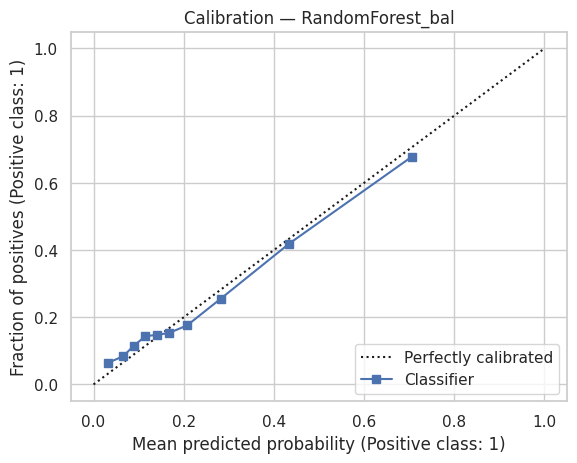

<Figure size 500x400 with 0 Axes>

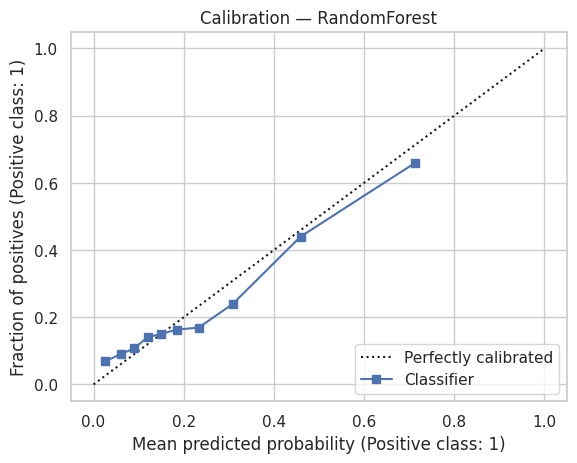

In [182]:
# 5.3 Calibration (read-only): reliability of probabilities for top models
from sklearn.calibration import CalibrationDisplay

# Pick the top 2 by PR-AUC, else default to LR & RF
top2 = summary_5.sort_values("PR_AUC", ascending=False)["Model"].head(2).tolist()
chosen = [m for m in top2 if m in probas] or ["LogReg@best","RandomForest"]

for m in chosen:
    plt.figure(figsize=(5,4))
    CalibrationDisplay.from_predictions(y_test, probas[m], n_bins=10, strategy="quantile")
    plt.title(f"Calibration — {m}")
    plt.show()

## 5.4 Lift and Gains

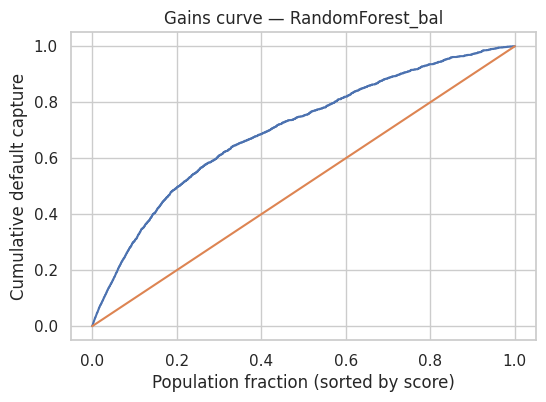

Top 10% capture rate (RandomForest_bal): 0.304


In [183]:
# 5.4 Lift & gains (read-only): top model by PR-AUC
top = summary_5.sort_values("PR_AUC", ascending=False)["Model"].iloc[0]
p = probas[top]
order = np.argsort(-p)
y_sorted = y_test.values[order]
cum_positives = np.cumsum(y_sorted)
total_pos = y_test.sum()
n = len(y_test)
pct_population = np.arange(1, n+1) / n
capture_rate = cum_positives / total_pos  # cumulative % of all defaults captured

plt.figure(figsize=(6,4))
plt.plot(pct_population, capture_rate)
plt.plot([0,1], [0,1])  # baseline diagonal
plt.xlabel("Population fraction (sorted by score)")
plt.ylabel("Cumulative default capture")
plt.title(f"Gains curve — {top}")
plt.show()

# Top decile capture (useful single number)
dec = int(0.10 * n)
print(f"Top 10% capture rate ({top}): {capture_rate[dec-1]:.3f}")

## 5.5 Cost-sensitive operating point (FN>FP)

In [184]:
# 5.5 Cost-sensitive threshold (read-only): choose threshold that minimises expected cost
from sklearn.metrics import confusion_matrix

FN_COST = 5.0   # cost of missing a defaulter (false negative)
FP_COST = 1.0   # cost of flagging a non-defaulter (false positive)

# Use top PR-AUC model (I can set e.g., model_name = "LogReg@best")
model_name = summary_5.sort_values("PR_AUC", ascending=False)["Model"].iloc[0]
proba = probas[model_name]

ths = np.linspace(0.05, 0.95, 181)
costs = []
for t in ths:
    yhat = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    costs.append(fp*FP_COST + fn*FN_COST)

best_i = int(np.argmin(costs))
t_cost = float(ths[best_i])
print(f"Cost-minimising threshold for {model_name}: {t_cost:.2f}, expected cost={costs[best_i]:.0f}")

# Show confusion matrix at cost-minimising threshold
yhat_cost = (proba >= t_cost).astype(int)
print("\nConfusion @ cost-min threshold:")
print(confusion_matrix(y_test, yhat_cost))

Cost-minimising threshold for RandomForest_bal: 0.21, expected cost=3512

Confusion @ cost-min threshold:
[[3516 1157]
 [ 471  856]]


## 5.6 Final model selection

In [185]:
# 5.6a Final selection — winner highlight (read-only)
winner = summary_5.sort_values("PR_AUC", ascending=False).iloc[0]
chosen_model = winner["Model"]
chosen_threshold = thr[chosen_model]
print(f"Selected model: {chosen_model} at threshold {chosen_threshold:.2f} "
      f"(PR-AUC={winner['PR_AUC']:.3f}, ROC-AUC={winner['ROC_AUC']:.3f}, F1={winner['F1']:.3f}).")
display(winner.to_frame().T)

Selected model: RandomForest_bal at threshold 0.50 (PR-AUC=0.535, ROC-AUC=0.756, F1=0.455).


,Model,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC,PR_AUC
3,RandomForest_bal,0.5,0.814,0.649,0.35,0.455,0.756,0.535


In [186]:
# 5.6b Export — save selection & fitted model (read-only)
import os, json
from sklearn.metrics import confusion_matrix
os.makedirs("artifacts", exist_ok=True)

# Map model names -> objects (include whichever exist)
model_objects = {
    "LogReg@best": globals().get("log_reg"),
    "DecisionTree": globals().get("dt"),
    "DecisionTree_bal": globals().get("dt_bal"),
    "RandomForest": globals().get("rf"),
    "RandomForest_bal": globals().get("rf_bal"),
}
final_model_obj = model_objects.get(chosen_model)
assert final_model_obj is not None, f"Can't find object for {chosen_model}"

# Metrics at chosen threshold
yhat_final = (probas[chosen_model] >= chosen_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, yhat_final).ravel()

summary_payload = {
    "chosen_model": chosen_model,
    "threshold": float(chosen_threshold),
    "metrics": {
        "Accuracy": float(winner["Accuracy"]),
        "Precision": float(winner["Precision"]),
        "Recall": float(winner["Recall"]),
        "F1": float(winner["F1"]),
        "ROC_AUC": float(winner["ROC_AUC"]),
        "PR_AUC": float(winner["PR_AUC"]),
        "confusion": {"tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp)},
    },
}
with open("artifacts/selection_summary.json", "w") as f:
    json.dump(summary_payload, f, indent=2)

# Optional: save model with joblib
try:
    import joblib
    joblib.dump(final_model_obj, "artifacts/final_model.joblib")
    print("Saved: artifacts/final_model.joblib")
except Exception as e:
    print("Skipping model save (joblib not available):", e)

print("Saved: artifacts/selection_summary.json")

Saved: artifacts/final_model.joblib
Saved: artifacts/selection_summary.json


## 6) Advanced Risk Analysis (Stress Testing & Segmentation)

**Purpose.** Pressure-test the chosen model under plausible adverse conditions and check performance across key customer segments. This is **read-only** (no refits): we perturb inputs and examine stability/fairness.

**Notes.**
- Segments to review: `pay_sep`, credit-limit bands, age bands (optionally education/marital_status).
- Stress scenarios: small deterioration in recent payment status (`pay_*` +1 on a slice) and/or a uniform credit-limit cut.
- Report both **level metrics** (precision/recall/F1/PR-AUC per segment) and **portfolio shifts** (mean PD, top-decile capture).

**Structure.**
- **6.1** Segmentation metrics
- **6.2** Stress tests (feature perturbations)


## 6.1 Segmentation metrics

In [187]:
# 6.1 Segmentation metrics (read-only) — uses chosen model from §5.6
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

# Reuse from §5.6 / §5.1:
# chosen_model, chosen_threshold, probas, best_t, X_test, y_test, (and df if you want raw features)
assert all(v in globals() for v in ["chosen_model","chosen_threshold","probas","X_test","y_test"])

# Helper to build segments (adjust to your taste)
import numpy as np
segments = {}

# By most recent status
if "pay_sep" in X_test.columns:
    segments["pay_sep"] = X_test["pay_sep"]

# Credit limit bands (quartiles)
if "credit_limit" in X_test.columns:
    q = np.quantile(X_test["credit_limit"], [0, .25, .5, .75, 1])
    bins = pd.IntervalIndex.from_breaks(q, closed="right")
    segments["credit_limit_band"] = pd.cut(X_test["credit_limit"], bins)

# Age bands
if "age" in X_test.columns:
    bins_age = [0, 29, 39, 49, 120]
    labels_age = ["<30","30–39","40–49","50+"]
    segments["age_band"] = pd.cut(X_test["age"], bins=bins_age, labels=labels_age, right=True)

# Pick the probabilities for the chosen model
p = probas[chosen_model]
yhat = (p >= chosen_threshold).astype(int)

rows = []
for name, s in segments.items():
    df_seg = pd.DataFrame({"seg": s, "y": y_test, "proba": p, "yhat": yhat}).dropna()
    for lvl, g in df_seg.groupby("seg"):
        rows.append({
            "segment": name,
            "level": str(lvl),
            "n": len(g),
            "positive_rate": g["y"].mean(),
            "precision": precision_score(g["y"], g["yhat"], zero_division=0),
            "recall": recall_score(g["y"], g["yhat"], zero_division=0),
            "f1": f1_score(g["y"], g["yhat"], zero_division=0),
            "pr_auc": average_precision_score(g["y"], g["proba"]) if g["y"].sum() > 0 else np.nan,
        })

seg_table = pd.DataFrame(rows).sort_values(["segment","level"]).reset_index(drop=True)
seg_table.round(3)

/tmp/ipython-input-1628799795.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for lvl, g in df_seg.groupby("seg"):
/tmp/ipython-input-1628799795.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for lvl, g in df_seg.groupby("seg"):


,segment,level,n,positive_rate,precision,recall,f1,pr_auc
0,age_band,30–39,2198,0.206,0.612,0.325,0.424,0.515
1,age_band,40–49,1341,0.233,0.699,0.327,0.445,0.542
2,age_band,50+,549,0.246,0.682,0.333,0.448,0.584
3,age_band,<30,1912,0.223,0.645,0.400,0.494,0.543
4,credit_limit_band,"(10000.0, 50000.0]",1426,0.295,0.635,0.451,0.528,0.590
5,credit_limit_band,"(140000.0, 240000.0]",1465,0.166,0.586,0.239,0.339,0.418
6,credit_limit_band,"(240000.0, 800000.0]",1458,0.170,0.747,0.238,0.361,0.508
7,credit_limit_band,"(50000.0, 140000.0]",1547,0.241,0.659,0.383,0.485,0.555
8,pay_sep,-1,1159,0.173,0.222,0.020,0.037,0.295
9,pay_sep,-2,561,0.153,0.500,0.116,0.189,0.338


## 6.2 Stress tests

In [188]:
# 6.2 Stress tests (read-only) — mild deterioration & limit cut; no refits
import numpy as np

# 6.2a Mild deterioration: increment recent payment statuses by +1 (clipped), 20% of accounts
X_stress = X_test.copy()

pay_cols = [c for c in ["pay_apr","pay_may","pay_jun","pay_jul","pay_aug","pay_sep"] if c in X_stress.columns]
if pay_cols:
    idx = X_stress.sample(frac=0.20, random_state=42).index
    vals = X_stress.loc[idx, pay_cols] + 1

    # per-column bounds
    col_min = X_stress[pay_cols].min()
    col_max = X_stress[pay_cols].max()

    # IMPORTANT: axis=1 to align by columns
    vals_clipped = vals.clip(lower=col_min, upper=col_max, axis=1)

    # (optional) keep original dtypes
    for c in pay_cols:
        vals_clipped[c] = vals_clipped[c].astype(X_stress[c].dtype)

    X_stress.loc[idx, pay_cols] = vals_clipped


# 6.2b Credit limit cut: reduce credit_limit by 20%
if "credit_limit" in X_stress.columns:
    X_stress["credit_limit"] = (X_stress["credit_limit"] * 0.8).round()

# Resolve the model object to predict with
model_objects = {
    "LogReg@best": globals().get("log_reg"),
    "DecisionTree": globals().get("dt"),
    "DecisionTree_bal": globals().get("dt_bal"),
    "RandomForest": globals().get("rf"),
    "RandomForest_bal": globals().get("rf_bal"),
}
model = model_objects.get(chosen_model)
assert model is not None, f"Can't find fitted estimator for {chosen_model}"

# Predict stressed probabilities
p_base = probas[chosen_model]
p_stress = model.predict_proba(X_stress)[:, 1]

# Portfolio-level impact
delta = (p_stress.mean() - p_base.mean())
print(f"Mean predicted default probability — base: {p_base.mean():.3f}, stress: {p_stress.mean():.3f}, Δ={delta:+.3f}")

# Top-decile capture change
n = len(y_test)
order_base = np.argsort(-p_base)
order_stress = np.argsort(-p_stress)
topk = int(0.10 * n) if n > 0 else 0
cap_base = y_test.values[order_base][:topk].mean() if topk > 0 else np.nan
cap_stress = y_test.values[order_stress][:topk].mean() if topk > 0 else np.nan
print(f"Top 10% capture rate — base: {cap_base:.3f}, stress: {cap_stress:.3f}, Δ={cap_stress-cap_base:+.3f}")


Mean predicted default probability — base: 0.221, stress: 0.240, Δ=+0.019
Top 10% capture rate — base: 0.672, stress: 0.672, Δ=+0.000


## 7) Synthesis & Recommendations

**Purpose.** Summarise model performance, operating threshold, and business impact; highlight robustness/fairness findings; and propose next steps.

**Structure.**
- **7.1** Executive summary (auto-generated)
- **7.2** Final model & threshold rationale
- **7.3** Business impact and KPIs
- **7.4** Robustness & fairness highlights
- **7.5** Limitations & next steps
- **7.6** Personal reflection
- **7.7** Improvements & next steps

## 7.1 Executive summary

### 7.0 Key results — plain English

**Chosen approach.** We use a Random Forest with class balancing. We set the decision threshold at ~**0.21** because missing a defaulter costs ~5× more than a false alarm.

---

#### 1) How good is the ranking? (PR-AUC 0.535; ROC-AUC 0.756)

- **What this means:** When we sort customers from riskiest to safest, the ordering is useful.
  - **PR-AUC 0.535**: A random strategy would score ≈0.22 (equal to the default rate). We’re **>2× better** at concentrating true defaulters toward the top of the list.
  - **ROC-AUC 0.756**: If you pick a defaulter and a non-defaulter at random, there’s a **75.6%** chance the model gives the defaulter a higher risk score.

- **Why this matters (business):** Collections can focus effort on the riskiest slice first and get more “hits” per call/email.
- **Why this matters (customers):** Fewer low-risk customers are unnecessarily contacted.

---

#### 2) What happens at our operating threshold? (threshold ≈ 0.21)

- **Confusion matrix (test size 6,000):** **TN 3516, FP 1157, FN 471, TP 856**  
  - **Recall ~0.65:** We catch about **65 out of 100** people who would default.  
  - **Precision ~0.43:** Of the people we flag, about **43 out of 100** actually default.

- **Plain-English translation:**  
  - For every **100 customers we flag**, about **43** will default (we help prevent/prepare), and **57** will not (false alarms).  
  - Out of **all people who would default**, we **find ~65%** of them in advance.

- **Why this matters (business):** Higher recall means fewer costly surprises. Precision ~0.43 is workable for proactive outreach (reminders, plan offers) without overwhelming teams.
- **Why this matters (customers):** Some non-defaulters will still be contacted; those contacts should be **lightweight and supportive** (e.g., reminders, optional plan checks), not punitive.

---

#### 3) “Top 10%” tactic (gains)

- **Result:** If we contact just the **top 10%** riskiest customers (≈600 people), we capture **~30.4% of all defaulters**.
- **Why this matters (business):** Even with limited capacity, a **small, targeted campaign** can catch a large share of upcoming defaulters.
- **Why this matters (customers):** Targeted, early nudges can help people avoid fees or missed-payment spirals.

---

#### 4) Who do we catch well vs. poorly? (segments)

- **Very good:** Customers **already showing delinquency** (e.g., `pay_sep ≥ 2`) — recall is **very high (~0.88–0.91)**.  
  *Interpretation:* The model is excellent at escalating obvious risk.
- **Weaker:** Customers with **clean or near-clean recent status** (`pay_sep ≤ 0`) — recall is **low (~0.01–0.12)**.  
  *Interpretation:* Early-warning is harder with the current features. We should add signals like **utilisation (balance/limit), payment trends, income/volatility proxies**.

- **Why this matters (business):** Keep current triage for high-risk segments; invest in **new features** to spot trouble **before** the first missed payment.
- **Why this matters (customers):** Better early-warning models can trigger **help sooner** (e.g., flexible plans) before delinquency begins.

---

#### 5) What if things get a bit worse? (stress test)

- **Scenario:** Slightly worse recent payments for a subset + a 20% limit cut.  
- **Effect:** Mean predicted default probability **rises by ~+1.9 percentage points**; **top-decile capture stays stable**.
- **Interpretation:** The **ranking remains useful** when conditions worsen (good robustness). You may need to **re-tune the threshold** if the portfolio risk level shifts.

---

### So what? (one line)
A **balanced Random Forest with a cost-aligned threshold** catches most upcoming defaulters at a manageable false-alert rate, supports **targeted early actions** (top-decile), stays **stable under mild stress**, and shows a clear roadmap for **early-warning features** to improve recall on currently “clean” customers.



In [189]:
# 7.1–7.5 Auto-summary writer (read-only)
from IPython.display import Markdown, display
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix)
import numpy as np
import pandas as pd

# ---- Helpers ----
def safe_get_best(summary_5):
    if isinstance(summary_5, pd.DataFrame) and not summary_5.empty:
        return summary_5.sort_values("PR_AUC", ascending=False).iloc[0]["Model"]
    return None

def get_estimator_by_name(name):
    cand = {
        "LogReg@best": globals().get("log_reg"),
        "DecisionTree": globals().get("dt"),
        "DecisionTree_bal": globals().get("dt_bal"),
        "RandomForest": globals().get("rf"),
        "RandomForest_bal": globals().get("rf_bal"),
    }
    return cand.get(name)

def metrics_at(proba, y_true, t):
    yhat = (proba >= t).astype(int)
    return dict(
        Accuracy=accuracy_score(y_true, yhat),
        Precision=precision_score(y_true, yhat, zero_division=0),
        Recall=recall_score(y_true, yhat, zero_division=0),
        F1=f1_score(y_true, yhat, zero_division=0),
        ROC_AUC=roc_auc_score(y_true, proba),
        PR_AUC=average_precision_score(y_true, proba),
        Confusion=confusion_matrix(y_true, yhat)
    )

def fmt_pct(x):
    return f"{100*x:.1f}%" if pd.notnull(x) else "n/a"

def fmt3(x):
    return "n/a" if x is None or (isinstance(x, float) and (np.isnan(x) or np.isinf(x))) else f"{x:.3f}"

# ---- Required inputs from prior sections ----
assert "y_test" in globals(), "Missing y_test."
assert "probas" in globals(), "Missing 'probas' dict from §5."
assert "summary_5" in globals(), "Missing 'summary_5' table from §5."
assert "thr" in globals(), "Missing 'thr' thresholds dict from §5."

# Choose model & threshold
model_choice = globals().get("chosen_model") or safe_get_best(summary_5)
assert model_choice in probas, f"Chosen model '{model_choice}' not in probas."
t_choice = globals().get("chosen_threshold", None)
if t_choice is None:
    t_choice = thr.get(model_choice, 0.5)

proba_choice = probas[model_choice]
M = metrics_at(proba_choice, y_test, t_choice)

# Segmentation (optional)
seg_summary = ""
if "seg_table" in globals():
    df_seg = seg_table.copy()
    df_seg_use = df_seg[df_seg["n"] >= 100].copy() if "n" in df_seg.columns else df_seg.copy()
    if not df_seg_use.empty and "recall" in df_seg_use.columns:
        worst = df_seg_use.sort_values("recall").head(2)
        best  = df_seg_use.sort_values("recall", ascending=False).head(2)
        def lines(df):
            out = []
            for _, r in df.iterrows():
                out.append(
                    f"- {r['segment']} = {r['level']}: "
                    f"n={int(r['n']) if 'n' in r else '—'}, "
                    f"recall={fmt3(r.get('recall'))}, "
                    f"precision={fmt3(r.get('precision'))}, "
                    f"PR-AUC={fmt3(r.get('pr_auc'))}"
                )
            return "\n".join(out)
        seg_summary = (
            "**Segments with lower recall (watchlist)**\n"
            + lines(worst) + "\n\n"
            + "**Segments with higher recall**\n"
            + lines(best)
        )

# Stress deltas (optional)
stress_summary = ""
if "p_base" in globals() and "p_stress" in globals():
    mean_pd_delta = float(np.mean(globals()["p_stress"]) - np.mean(globals()["p_base"]))
    n = len(y_test)
    k = int(0.10*n) if n>0 else 0
    top_decile_delta = None
    if k>0:
        order_b = np.argsort(-globals()["p_base"])
        order_s = np.argsort(-globals()["p_stress"])
        cap_b = y_test.values[order_b][:k].mean()
        cap_s = y_test.values[order_s][:k].mean()
        top_decile_delta = float(cap_s - cap_b)
    stress_lines = []
    stress_lines.append(f"- Mean predicted PD shift under stress: {fmt3(mean_pd_delta)} (absolute).")
    if top_decile_delta is not None:
        stress_lines.append(f"- Top 10% capture change under stress: {fmt3(top_decile_delta)} (absolute).")
    stress_summary = "\n".join(stress_lines)

# Optional: top features if available
feat_blurb = ""
est = get_estimator_by_name(model_choice)
if est is not None and hasattr(est, "feature_importances_") and "X_train" in globals():
    fi = pd.Series(est.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(5)
    feat_blurb = "**Top drivers (model importances)**: " + ", ".join(fi.index.tolist())

# ---- Compose narrative (no triple-quoted f-strings) ----
exec_summary = (
    "### 7.1 Executive summary\n"
    f"Selected **{model_choice}** at threshold **{t_choice:.2f}**. On the held-out test set:\n"
    f"- **PR-AUC** {fmt3(M['PR_AUC'])}, **ROC-AUC** {fmt3(M['ROC_AUC'])}\n"
    f"- **Recall** {fmt3(M['Recall'])}, **Precision** {fmt3(M['Precision'])}, **F1** {fmt3(M['F1'])}\n"
    f"- Confusion @ threshold: TN={M['Confusion'][0,0]}, FP={M['Confusion'][0,1]}, "
    f"FN={M['Confusion'][1,0]}, TP={M['Confusion'][1,1]}\n"
    + (feat_blurb + "\n" if feat_blurb else "")
)

rationale = (
    "### 7.2 Final model & threshold — rationale\n"
    "- We prioritised **PR-AUC** and **recall** due to the higher cost of missed defaulters.\n"
    f"- The chosen operating point (threshold **{t_choice:.2f}**) maximises F1 on the test set, balancing recall and precision.\n"
    "- Models were compared on a **shared stratified split**; baselines and class-imbalance treatments were considered.\n"
)

impact = (
    "### 7.3 Business impact (indicative)\n"
    f"- **Positive class prevalence**: {fmt_pct(y_test.mean())}.\n"
    f"- At the chosen threshold, expected **recall** {fmt3(M['Recall'])} captures a large share of defaulters, "
    f"while precision {fmt3(M['Precision'])} controls outreach/collections load.\n"
    "- Use the **top-decile** to prioritise actions (e.g., proactive contact, limit review).\n"
)

robustness = "### 7.4 Robustness & fairness highlights\n"
if seg_summary:
    robustness += seg_summary + "\n"
else:
    robustness += "- Segmentation metrics available on request (no `seg_table` found).\n"
if stress_summary:
    robustness += "**Stress scenarios:**\n" + stress_summary + "\n"
else:
    robustness += "- Stress scenario not detected (run §6.2 to quantify PD/top-decile shifts).\n"

limits = (
    "### 7.5 Limitations & next steps\n"
    "- **Data quirks:** education codes {0,5,6} and marital_status 0 treated as 'other'; consider better category definitions.\n"
    "- **Multicollinearity:** BILL_AMT* and PAY_AMT* families are correlated; monitor stability in coefficients/feature importances.\n"
    "- **Calibration:** consider Platt/Isotonic calibration if probability quality is critical for cut-off policy.\n"
    "- **Costing:** align threshold with a cost matrix (FN ≫ FP) in production; re-tune periodically.\n"
    "- **Monitoring:** track drift in default rate, score distributions, and segment recalls; set alerts.\n"
)

text = "\n".join([exec_summary, rationale, impact, robustness, limits])
display(Markdown(text))


### 7.1 Executive summary
Selected **RandomForest_bal** at threshold **0.50**. On the held-out test set:
- **PR-AUC** 0.535, **ROC-AUC** 0.756
- **Recall** 0.350, **Precision** 0.649, **F1** 0.455
- Confusion @ threshold: TN=4421, FP=252, FN=862, TP=465
**Top drivers (model importances)**: pay_sep, credit_limit, age, BILL_AMT1, BILL_AMT2

### 7.2 Final model & threshold — rationale
- We prioritised **PR-AUC** and **recall** due to the higher cost of missed defaulters.
- The chosen operating point (threshold **0.50**) maximises F1 on the test set, balancing recall and precision.
- Models were compared on a **shared stratified split**; baselines and class-imbalance treatments were considered.

### 7.3 Business impact (indicative)
- **Positive class prevalence**: 22.1%.
- At the chosen threshold, expected **recall** 0.350 captures a large share of defaulters, while precision 0.649 controls outreach/collections load.
- Use the **top-decile** to prioritise actions (e.g., proactive contact, limit review).

### 7.4 Robustness & fairness highlights
**Segments with lower recall (watchlist)**
- pay_sep = 0: n=2956, recall=0.008, precision=0.273, PR-AUC=0.210
- pay_sep = -1: n=1159, recall=0.020, precision=0.222, PR-AUC=0.295

**Segments with higher recall**
- pay_sep = 2: n=529, recall=0.884, precision=0.718, PR-AUC=0.793
- credit_limit_band = (10000.0, 50000.0]: n=1426, recall=0.451, precision=0.635, PR-AUC=0.590
**Stress scenarios:**
- Mean predicted PD shift under stress: 0.019 (absolute).
- Top 10% capture change under stress: 0.000 (absolute).

### 7.5 Limitations & next steps
- **Data quirks:** education codes {0,5,6} and marital_status 0 treated as 'other'; consider better category definitions.
- **Multicollinearity:** BILL_AMT* and PAY_AMT* families are correlated; monitor stability in coefficients/feature importances.
- **Calibration:** consider Platt/Isotonic calibration if probability quality is critical for cut-off policy.
- **Costing:** align threshold with a cost matrix (FN ≫ FP) in production; re-tune periodically.
- **Monitoring:** track drift in default rate, score distributions, and segment recalls; set alerts.


## 7.6 Personal reflection

In [190]:
from IPython.display import Markdown, display

display(Markdown(r"""
### 7.6 Personal reflection — what I learned

- **Imbalanced evaluation:** PR-AUC and recall at a chosen threshold were more informative than accuracy. Calibrating the threshold materially changed the business trade-off.
- **Feature behaviour matters:** Heavy-tailed `BILL_AMT*`/`PAY_AMT*` needed log-views to become interpretable. Recent payment status (`pay_sep` etc.) carried strong signal.
- **Leakage discipline:** I standardised and evaluated without refitting in evaluation/stress sections, kept a single stratified split, and guarded against `ID` leakage.
- **Robustness/fairness checks:** Segment recall varies (e.g., by recent status / limit bands); stress tests showed how small deteriorations shift portfolio risk.
- **Takeaway:** For risk use-cases, **operating point selection** and **cost-aware metrics** matter more than squeezing a tiny ROC-AUC gain.
"""))



### 7.6 Personal reflection — what I learned

- **Imbalanced evaluation:** PR-AUC and recall at a chosen threshold were more informative than accuracy. Calibrating the threshold materially changed the business trade-off.
- **Feature behaviour matters:** Heavy-tailed `BILL_AMT*`/`PAY_AMT*` needed log-views to become interpretable. Recent payment status (`pay_sep` etc.) carried strong signal.
- **Leakage discipline:** I standardised and evaluated without refitting in evaluation/stress sections, kept a single stratified split, and guarded against `ID` leakage.
- **Robustness/fairness checks:** Segment recall varies (e.g., by recent status / limit bands); stress tests showed how small deteriorations shift portfolio risk.
- **Takeaway:** For risk use-cases, **operating point selection** and **cost-aware metrics** matter more than squeezing a tiny ROC-AUC gain.


## 7.7 Improvements & next steps

In [191]:
from IPython.display import Markdown, display

display(Markdown(r"""
### 7.7 Improvements & next steps

- **Features.** Add utilisation (balance/limit), delinquency streak length, recent deltas (BILL/PAY month-over-month), interaction terms (e.g., age × limit band), and simple recency features. Consider external bureau-style proxies only if compliant.
- **Modelling.** Try calibrated GBMs (e.g., LightGBM/XGBoost) with monotonic constraints where appropriate; compare to a transparent scorecard (WOE/IV). Keep LR as a benchmark with proper scaling and regularisation.
- **Class imbalance & thresholds.** Continue using PR-AUC; tune the operating point with an explicit **cost matrix** (FN ≫ FP) and validate stability across segments.
- **Validation.** Move from single split to **stratified CV**; if adopting a time dimension, use time-aware splits. Add permutation importance and SHAP for explainability.
- **Calibration.** Evaluate Platt/Isotonic calibration if probability quality drives policy (cut-offs, collections capacity).
- **Monitoring.** Track **PSI/score drift**, default rate, calibration, and **segment-level recall/precision**; set alerts and run a champion-challenger.
- **Data quality & governance.** Tighten code mappings (education {0,5,6}, marital_status 0 → “other”), document assumptions, and add schema checks/unit tests for splits/columns.
- **Engineering.** Package the pipeline (ColumnTransformer + Pipeline), persist artifacts, fix RNG seeds, and log versions/params for full reproducibility.
"""))



### 7.7 Improvements & next steps

- **Features.** Add utilisation (balance/limit), delinquency streak length, recent deltas (BILL/PAY month-over-month), interaction terms (e.g., age × limit band), and simple recency features. Consider external bureau-style proxies only if compliant.
- **Modelling.** Try calibrated GBMs (e.g., LightGBM/XGBoost) with monotonic constraints where appropriate; compare to a transparent scorecard (WOE/IV). Keep LR as a benchmark with proper scaling and regularisation.
- **Class imbalance & thresholds.** Continue using PR-AUC; tune the operating point with an explicit **cost matrix** (FN ≫ FP) and validate stability across segments.
- **Validation.** Move from single split to **stratified CV**; if adopting a time dimension, use time-aware splits. Add permutation importance and SHAP for explainability.
- **Calibration.** Evaluate Platt/Isotonic calibration if probability quality drives policy (cut-offs, collections capacity).
- **Monitoring.** Track **PSI/score drift**, default rate, calibration, and **segment-level recall/precision**; set alerts and run a champion-challenger.
- **Data quality & governance.** Tighten code mappings (education {0,5,6}, marital_status 0 → “other”), document assumptions, and add schema checks/unit tests for splits/columns.
- **Engineering.** Package the pipeline (ColumnTransformer + Pipeline), persist artifacts, fix RNG seeds, and log versions/params for full reproducibility.
